In [1]:
import pandas as pd
import numpy as np
import random 

import statsmodels.formula.api as sm
import sys
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline 

sys.version

'3.6.3 |Anaconda custom (64-bit)| (default, Oct  6 2017, 12:04:38) \n[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]'

In [2]:
!pip show statsmodels

Name: statsmodels
Version: 0.8.0
Summary: Statistical computations and models for Python
Home-page: http://www.statsmodels.org/
Author: Skipper Seabold, Josef Perktold
Author-email: pystatsmodels@googlegroups.com
License: BSD License
Location: /anaconda3/lib/python3.6/site-packages
Requires: 
You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
### read in raw data

d = pd.read_csv('../data/raw_data.csv')
d = d.dropna(how='any')
d.head()

Date         Location  Treatment as_measured  amount_used collector  \
0  3/10/18  eca- front desk        0.0        1594          0.0     Nikki   
1  3/11/18  eca- front desk        0.0        1583         11.0     Nikki   
2  3/12/18  eca- front desk        0.0        1573         10.0     Nikki   
3  3/13/18  eca- front desk        0.0        1566          7.0     Nikki   
4  3/14/18  eca- front desk        0.0        1549         17.0     Nikki   

   google_second_wave_trend  google_drug_resistant_trend  is_suspicious  
0                       0.0                          0.0            0.0  
1                       0.0                          0.0            0.0  
2                       0.0                          0.0            0.0  
3                       0.0                         48.0            0.0  
4                       0.0                          0.0            0.0

In [4]:
d.shape

(212, 9)

In [5]:
### get summary stats for treatment useage
d[d['Treatment'] == 1]['amount_used'].describe()

count     77.000000
mean      12.051948
std       31.195013
min       -4.000000
25%        3.000000
50%        7.000000
75%       12.000000
max      273.000000
Name: amount_used, dtype: float64

In [6]:
### get summary stats for treament useage
d[d['Treatment'] == 0]['amount_used'].describe()

count    135.000000
mean       7.629630
std       26.690806
min     -158.000000
25%        1.000000
50%        5.000000
75%        9.000000
max      203.000000
Name: amount_used, dtype: float64

In [7]:
### find difference in means for ctrl/treatment
diff_mean = (d[d['Treatment'] == 1]['amount_used'].describe()['mean'] - d[d['Treatment'] == 0]['amount_used'].describe()['mean'])
diff_mean

4.4223184223184226

In [8]:
### create numeric mapping for locations
unique_locs = d.Location.value_counts().index.tolist()
loc_map = [x for x in range(len(unique_locs))]
loc_set = dict(zip(unique_locs, loc_map))
#loc_set

d['numeric_location'] = d['Location'].map(lambda x: loc_set[x] if x in loc_set.keys() else -1)
d.head()
#d['Location'].value_counts().sum()

Date         Location  Treatment as_measured  amount_used collector  \
0  3/10/18  eca- front desk        0.0        1594          0.0     Nikki   
1  3/11/18  eca- front desk        0.0        1583         11.0     Nikki   
2  3/12/18  eca- front desk        0.0        1573         10.0     Nikki   
3  3/13/18  eca- front desk        0.0        1566          7.0     Nikki   
4  3/14/18  eca- front desk        0.0        1549         17.0     Nikki   

   google_second_wave_trend  google_drug_resistant_trend  is_suspicious  \
0                       0.0                          0.0            0.0   
1                       0.0                          0.0            0.0   
2                       0.0                          0.0            0.0   
3                       0.0                         48.0            0.0   
4                       0.0                          0.0            0.0   

   numeric_location  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [9]:
loc_set

{'Avalon - Gym': 3,
 'Avalon - Lobby': 10,
 'concur - 10th floor': 7,
 'concur - 16th floor': 5,
 'concur - 3rd floor': 4,
 'concur - 5th floor': 9,
 'concur -12th floor': 8,
 'eca- front desk': 0,
 'ped - well': 2,
 'ped- not well': 6,
 'yarn shop': 1}

In [10]:
d.tail()

Date      Location  Treatment as_measured  amount_used collector  \
218   4/9/18  Avalon - Gym        0.0        1756          7.0    Carmen   
219  4/10/18  Avalon - Gym        0.0        1749          7.0    Carmen   
220  4/11/18  Avalon - Gym        0.0        1742          7.0    Carmen   
221  4/12/18  Avalon - Gym        0.0        1740          2.0    Carmen   
222  4/13/18  Avalon - Gym        0.0        1735          5.0    Carmen   

     google_second_wave_trend  google_drug_resistant_trend  is_suspicious  \
218                      31.0                         31.0            0.0   
219                       0.0                         46.0            0.0   
220                      15.0                         54.0            0.0   
221                       0.0                         47.0            0.0   
222                       0.0                         66.0            0.0   

     numeric_location  
218                 3  
219                 3  
220                 3  
221                 3  
222                 3

In [11]:
d['numeric_location'].value_counts()

0     28
1     26
6     20
5     20
4     20
3     20
2     20
8     19
7     19
9     16
10     4
Name: numeric_location, dtype: int64

In [12]:
### without clustering, without ignoring outlyers, just straight OLS


ols_revised = sm.ols(formula="amount_used ~ Treatment", data=d).fit(
                                                         use_t=True)
ols_revised.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            amount_used   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.189
Date:                Tue, 17 Apr 2018   Prob (F-statistic):              0.277
Time:                        12:05:35   Log-Likelihood:                -1009.3
No. Observations:                 212   AIC:                             2023.
Df Residuals:                     210   BIC:                             2029.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.6296      2.445      3.121      0.002       2.838      12.421
Treatment      4.4223      4.056      1.090      0.276      -3.528      12.372
==============================================================================
Omnibus:                      264.110   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23723.717
Skew:                           4.987   Prob(JB):                         0.00
Kurtosis:                      53.855   Cond. No.                         2.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
### run a quick linear regression with clustering on location

ols_revised = sm.ols(formula="amount_used ~ Treatment", data=d).fit(
                                                        cov_type='cluster',
                                                        cov_kwds={'groups': d['numeric_location']},
                                                         use_t=True)
ols_revised.summary()

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            amount_used   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                    0.9422
Date:                Tue, 17 Apr 2018   Prob (F-statistic):              0.355
Time:                        12:05:35   Log-Likelihood:                -1009.3
No. Observations:                 212   AIC:                             2023.
Df Residuals:                     210   BIC:                             2029.
Df Model:                           1                                         
Covariance Type:              cluster                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.6296      3.016      2.530      0.030       0.909      14.350
Treatment      4.4223      4.556      0.971      0.355      -5.729      14.574
==============================================================================
Omnibus:                      264.110   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23723.717
Skew:                           4.987   Prob(JB):                         0.00
Kurtosis:                      53.855   Cond. No.                         2.42
==============================================================================

Warnings:
[1] Standard Errors are robust tocluster correlation (cluster)
"""

In [14]:
### We can see from the results that the pvalue for treatment is not below the Z test

In [15]:
### check out when adding in google trends for "flu second wave"
ols_revised = sm.ols(formula="amount_used ~ Treatment + google_second_wave_trend + Treatment*google_second_wave_trend",
                                                        data=d).fit(
                                                        cov_type='cluster',
                                                        cov_kwds={'groups': d['numeric_location']},
                                                         use_t=True)
ols_revised.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            amount_used   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.9098
Date:                Tue, 17 Apr 2018   Prob (F-statistic):              0.470
Time:                        12:05:35   Log-Likelihood:                -1009.1
No. Observations:                 212   AIC:                             2026.
Df Residuals:                     208   BIC:                             2040.
Df Model:                           3                                         
Covariance Type:              cluster                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              6.8786      2.093      3.287      0.008       2.216      11.541
Treatment                              4.7146      3.009      1.567      0.148      -1.991      11.420
google_second_wave_trend               0.0504      0.132      0.382      0.711      -0.244       0.345
Treatment:google_second_wave_trend    -0.0347      0.156     -0.222      0.829      -0.383       0.314
==============================================================================
Omnibus:                      260.757   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23221.376
Skew:                           4.874   Prob(JB):                         0.00
Kurtosis:                      53.337   Cond. No.                         120.
==============================================================================

Warnings:
[1] Standard Errors are robust tocluster correlation (cluster)
"""

In [16]:
### check out when adding in google trends for "drug resistant"
ols_revised = sm.ols(formula="amount_used ~ Treatment + google_drug_resistant_trend + Treatment*google_drug_resistant_trend",
                                                        data=d).fit(
                                                        cov_type='cluster',
                                                        cov_kwds={'groups': d['numeric_location']},
                                                         use_t=True)
ols_revised.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            amount_used   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.7695
Date:                Tue, 17 Apr 2018   Prob (F-statistic):              0.537
Time:                        12:05:35   Log-Likelihood:                -1008.7
No. Observations:                 212   AIC:                             2025.
Df Residuals:                     208   BIC:                             2039.
Df Model:                           3                                         
Covariance Type:              cluster                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 7.1273      3.431      2.077      0.065      -0.518      14.773
Treatment                                 7.0272      6.478      1.085      0.303      -7.407      21.462
google_drug_resistant_trend               0.0251      0.055      0.454      0.660      -0.098       0.148
Treatment:google_drug_resistant_trend    -0.1205      0.104     -1.156      0.274      -0.353       0.112
==============================================================================
Omnibus:                      262.767   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23209.180
Skew:                           4.949   Prob(JB):                         0.00
Kurtosis:                      53.294   Cond. No.                         111.
==============================================================================

Warnings:
[1] Standard Errors are robust tocluster correlation (cluster)
"""

In [17]:
###next steps:
### add in dummies for location and then add them into the OLS formula
dum = pd.get_dummies(d['Location'])
d = pd.concat([d, dum], axis = 1)
d.head()

Date         Location  Treatment as_measured  amount_used collector  \
0  3/10/18  eca- front desk        0.0        1594          0.0     Nikki   
1  3/11/18  eca- front desk        0.0        1583         11.0     Nikki   
2  3/12/18  eca- front desk        0.0        1573         10.0     Nikki   
3  3/13/18  eca- front desk        0.0        1566          7.0     Nikki   
4  3/14/18  eca- front desk        0.0        1549         17.0     Nikki   

   google_second_wave_trend  google_drug_resistant_trend  is_suspicious  \
0                       0.0                          0.0            0.0   
1                       0.0                          0.0            0.0   
2                       0.0                          0.0            0.0   
3                       0.0                         48.0            0.0   
4                       0.0                          0.0            0.0   

   numeric_location    ...      Avalon - Lobby  concur - 10th floor  \
0                 0    ...                   0                    0   
1                 0    ...                   0                    0   
2                 0    ...                   0                    0   
3                 0    ...                   0                    0   
4                 0    ...                   0                    0   

   concur - 16th floor  concur - 3rd floor  concur - 5th floor  \
0                    0                   0                   0   
1                    0                   0                   0   
2                    0                   0                   0   
3                    0                   0                   0   
4                    0                   0                   0   

   concur -12th floor  eca- front desk  ped - well  ped- not well  yarn shop  
0                   0                1           0              0          0  
1                   0                1           0              0          0  
2                   0                1           0              0          0  
3                   0                1           0              0          0  
4                   0                1           0              0          0  

[5 rows x 21 columns]

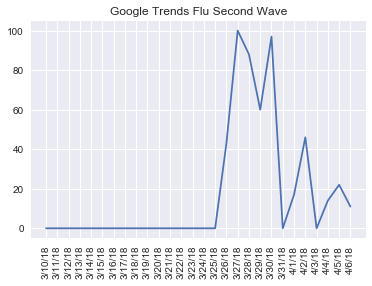

In [18]:
plt.plot(d['Date'][:28], d['google_second_wave_trend'][:28])
plt.title('Google Trends Flu Second Wave')
plt.xticks(d['Date'][:28], d['Date'][:28], rotation='vertical')
plt.show()

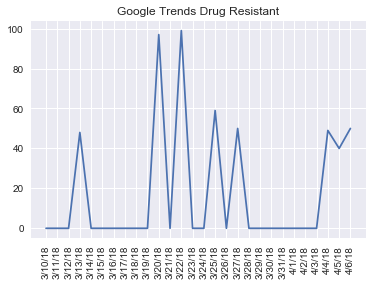

In [19]:
plt.plot(d['Date'][:28], d['google_drug_resistant_trend'][:28])
plt.title('Google Trends Drug Resistant')
plt.xticks(d['Date'][:28], d['Date'][:28], rotation='vertical')
plt.show()

In [20]:
from pathlib import Path
import pandas as pd
import numpy as np
import random 

import statsmodels.formula.api as sm
import math
from sklearn import linear_model

from matplotlib import pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline 


import datetime
import sys

### for debugging purposes
###sys.version
### should say:
###'3.6.3 |Anaconda custom (64-bit)| (default, Oct  6 2017, 12:04:38) \n
###[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]'


### begin ETL

d = pd.read_csv('../data/raw_data.csv')
d_working = d.dropna(how='any')


### create numeric mapping for locations
unique_locs = d.Location.value_counts().index.tolist()
loc_map = [x for x in range(len(unique_locs))]
loc_set = dict(zip(unique_locs, loc_map))
#loc_set

d_working['numeric_location'] = d_working['Location'].map(lambda x: loc_set[x] if x in loc_set.keys() else -1)

### get dummies for locations
dum = pd.get_dummies(d_working['numeric_location'])
dum.columns = ['loc_%s' % (x) for x in dum.columns.tolist()]
d_working = pd.concat([d_working, dum], axis = 1)

### create week aggregates

def week_num(date_string):
    date = datetime.datetime.strptime(date_string,'%m/%d/%y')
    return datetime.date.isocalendar(date)[1]

d_working['week_number'] = d_working['Date'].apply(week_num)


### create a calculated field that staggers the google trends to the next day
d_working['stagger_second_flu_trend'] = [0] + d_working['google_second_wave_trend'].tolist()[:-1]
d_working['stagger_drug_resistant'] = [0] + d_working['google_drug_resistant_trend'].tolist()[:-1]




d_working.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Date         Location  Treatment as_measured  amount_used collector  \
0  3/10/18  eca- front desk        0.0        1594          0.0     Nikki   
1  3/11/18  eca- front desk        0.0        1583         11.0     Nikki   
2  3/12/18  eca- front desk        0.0        1573         10.0     Nikki   
3  3/13/18  eca- front desk        0.0        1566          7.0     Nikki   
4  3/14/18  eca- front desk        0.0        1549         17.0     Nikki   

   google_second_wave_trend  google_drug_resistant_trend  is_suspicious  \
0                       0.0                          0.0            0.0   
1                       0.0                          0.0            0.0   
2                       0.0                          0.0            0.0   
3                       0.0                         48.0            0.0   
4                       0.0                          0.0            0.0   

   numeric_location           ...            loc_4  loc_5  loc_6  loc_7  \
0                 1           ...                0      0      0      0   
1                 1           ...                0      0      0      0   
2                 1           ...                0      0      0      0   
3                 1           ...                0      0      0      0   
4                 1           ...                0      0      0      0   

   loc_8  loc_9  loc_10  week_number  stagger_second_flu_trend  \
0      0      0       0           10                       0.0   
1      0      0       0           10                       0.0   
2      0      0       0           11                       0.0   
3      0      0       0           11                       0.0   
4      0      0       0           11                       0.0   

   stagger_drug_resistant  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                    48.0  

[5 rows x 24 columns]

In [34]:
ols_revised = sm.ols(formula="amount_used ~ Treatment + stagger_second_flu_trend + stagger_drug_resistant",
                                                        data=d_working).fit(
#                                                         cov_type='cluster',
#                                                         cov_kwds={'groups': d_working['numeric_location']},
                                                         use_t=True)
ols_revised.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            amount_used   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.7550
Date:                Tue, 17 Apr 2018   Prob (F-statistic):              0.521
Time:                        12:34:55   Log-Likelihood:                -1008.7
No. Observations:                 212   AIC:                             2025.
Df Residuals:                     208   BIC:                             2039.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    5.9421      2.956      2.010      0.044       0.148      11.736
Treatment                    3.7069      4.154      0.892      0.372      -4.436      11.850
stagger_second_flu_trend     0.0502      0.062      0.812      0.417      -0.071       0.171
stagger_drug_resistant       0.0458      0.063      0.730      0.466      -0.077       0.169
==============================================================================
Omnibus:                      260.894   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23217.602
Skew:                           4.879   Prob(JB):                         0.00
Kurtosis:                      53.331   Cond. No.                         94.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
d_working.columns

Index(['Date', 'Location', 'Treatment', 'as_measured', 'amount_used',
       'collector', 'google_second_wave_trend', 'google_drug_resistant_trend',
       'is_suspicious', 'numeric_location', 'loc_0', 'loc_1', 'loc_2', 'loc_3',
       'loc_4', 'loc_5', 'loc_6', 'loc_7', 'loc_8', 'loc_9', 'loc_10',
       'week_number', 'stagger_second_flu_trend', 'stagger_drug_resistant'],
      dtype='object')

In [33]:
ols_revised = sm.ols(formula="amount_used ~ Treatment + google_second_wave_trend + google_drug_resistant_trend ",
                                                        data=d_working).fit(
#                                                         cov_type='cluster',
#                                                         cov_kwds={'groups': d_working['numeric_location']},
                                                         use_t=True)
ols_revised.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            amount_used   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.5276
Date:                Tue, 17 Apr 2018   Prob (F-statistic):              0.664
Time:                        12:34:41   Log-Likelihood:                -1009.1
No. Observations:                 212   AIC:                             2026.
Df Residuals:                     208   BIC:                             2040.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       7.5429      2.953      2.554      0.011       1.755      13.331
Treatment                       4.0019      4.174      0.959      0.338      -4.179      12.183
google_second_wave_trend        0.0320      0.062      0.515      0.607      -0.090       0.154
google_drug_resistant_trend    -0.0195      0.063     -0.310      0.756      -0.143       0.104
==============================================================================
Omnibus:                      260.799   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23122.133
Skew:                           4.878   Prob(JB):                         0.00
Kurtosis:                      53.224   Cond. No.                         94.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
ols_revised = sm.ols(formula="amount_used ~ Treatment + stagger_second_flu_trend + stagger_drug_resistant + google_second_wave_trend + google_drug_resistant_trend ",
                                                        data=d_working).fit(
#                                                         cov_type='cluster',
#                                                         cov_kwds={'groups': d_working['numeric_location']},
                                                         use_t=True)
ols_revised.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            amount_used   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.5040
Date:                Tue, 17 Apr 2018   Prob (F-statistic):              0.773
Time:                        12:35:32   Log-Likelihood:                -1008.6
No. Observations:                 212   AIC:                             2029.
Df Residuals:                     206   BIC:                             2049.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       6.4851      3.154      2.056      0.040       0.303      12.668
Treatment                       3.8454      4.192      0.917      0.359      -4.371      12.062
stagger_second_flu_trend        0.0464      0.109      0.425      0.671      -0.168       0.260
stagger_drug_resistant          0.0577      0.067      0.858      0.391      -0.074       0.190
google_second_wave_trend       -0.0014      0.109     -0.013      0.990      -0.214       0.212
google_drug_resistant_trend    -0.0353      0.068     -0.520      0.603      -0.168       0.098
==============================================================================
Omnibus:                      260.154   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23079.219
Skew:                           4.855   Prob(JB):                         0.00
Kurtosis:                      53.184   Cond. No.                         126.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
d_week = d_working.groupby(['week_number', 'Treatment', 'numeric_location']).sum()
d_week.reset_index(inplace=True)
d_week = d_week[['week_number', 'Treatment', 'numeric_location', 'amount_used',
       'google_second_wave_trend', 'google_drug_resistant_trend',
       'is_suspicious', 'stagger_second_flu_trend', 'stagger_drug_resistant']]

loc_dum = pd.get_dummies(d_week['numeric_location'])
loc_dum.columns = ['loc_%s' % (x) for x in loc_dum.columns.tolist()]
d_working = pd.concat([d_week, loc_dum], axis = 1)
d_working.head()

week_number  Treatment  numeric_location  amount_used  \
0           10        0.0                 0          4.0   
1           10        0.0                 1         11.0   
2           10        0.0                 2         53.0   
3           10        0.0                 6         73.0   
4           10        0.0                10          4.0   

   google_second_wave_trend  google_drug_resistant_trend  is_suspicious  \
0                      14.0                         49.0            0.0   
1                       0.0                          0.0            0.0   
2                      14.0                         97.0            0.0   
3                      14.0                         97.0            0.0   
4                       0.0                          0.0            0.0   

   stagger_second_flu_trend  stagger_drug_resistant  loc_0  loc_1  loc_2  \
0                      25.0                    99.0      1      0      0   
1                       0.0                     0.0      0      1      0   
2                      25.0                   147.0      0      0      1   
3                      14.0                    97.0      0      0      0   
4                       7.0                     0.0      0      0      0   

   loc_3  loc_4  loc_5  loc_6  loc_7  loc_8  loc_9  loc_10  
0      0      0      0      0      0      0      0       0  
1      0      0      0      0      0      0      0       0  
2      0      0      0      0      0      0      0       0  
3      0      0      0      1      0      0      0       0  
4      0      0      0      0      0      0      0       1

In [45]:
d_working.shape

(48, 20)

In [50]:
ols_revised = sm.ols(formula="amount_used ~ Treatment \
                            + loc_0 + loc_1 + loc_2 + loc_3 + loc_4 + loc_5 + loc_6 + loc_7 \
                            + loc_8 + loc_9 + loc_10",
                                                        data=d_working).fit(
#                                                         cov_type='cluster',
#                                                         cov_kwds={'groups': d_working['numeric_location']},
                                                         use_t=True)
ols_revised.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            amount_used   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     1.151
Date:                Tue, 17 Apr 2018   Prob (F-statistic):              0.353
Time:                        13:39:18   Log-Likelihood:                -261.23
No. Observations:                  48   AIC:                             546.5
Df Residuals:                      36   BIC:                             568.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.0465     10.895      3.125      0.002      12.693      55.400
Treatment     13.6446     20.322      0.671      0.502     -26.186      53.475
loc_0        -33.6540     25.761     -1.306      0.191     -84.144      16.836
loc_1         11.4645     25.798      0.444      0.657     -39.098      62.027
loc_2         61.0423     30.735      1.986      0.047       0.802     121.283
loc_3         -6.7077     30.735     -0.218      0.827     -66.948      53.533
loc_4        -32.6189     30.898     -1.056      0.291     -93.178      27.941
loc_5          0.2923     30.735      0.010      0.992     -59.948      60.533
loc_6         30.8811     30.898      0.999      0.318     -29.678      91.441
loc_7         51.1311     30.898      1.655      0.098      -9.428     111.691
loc_8        -28.2077     30.735     -0.918      0.359     -88.448      32.033
loc_9         10.8811     30.898      0.352      0.725     -49.678      71.441
loc_10       -30.4577     30.735     -0.991      0.322     -90.698      29.783
==============================================================================
Omnibus:                       26.440   Durbin-Watson:                   2.449
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.277
Skew:                           1.075   Prob(JB):                     1.03e-27
Kurtosis:                      10.584   Cond. No.                     1.13e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.65e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [49]:
ols_revised = sm.ols(formula="amount_used ~ Treatment + stagger_second_flu_trend + stagger_drug_resistant \
                            + loc_0 + loc_1 + loc_2 + loc_3 + loc_4 + loc_5 + loc_6 + loc_7 \
                            + loc_8 + loc_9 + loc_10",
                                                        data=d_working).fit(
#                                                         cov_type='cluster',
#                                                         cov_kwds={'groups': d_working['numeric_location']},
                                                         use_t=True)
ols_revised.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            amount_used   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1.213
Date:                Tue, 17 Apr 2018   Prob (F-statistic):              0.313
Time:                        13:38:41   Log-Likelihood:                -259.32
No. Observations:                  48   AIC:                             546.6
Df Residuals:                      34   BIC:                             572.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   25.9748     18.569      1.399      0.162     -10.419      62.369
Treatment                    6.3454     20.692      0.307      0.759     -34.210      46.901
stagger_second_flu_trend     0.1180      0.073      1.617      0.106      -0.025       0.261
stagger_drug_resistant       0.0091      0.161      0.057      0.955      -0.307       0.325
loc_0                      -34.8356     25.485     -1.367      0.172     -84.785      15.114
loc_1                       12.9343     25.609      0.505      0.614     -37.258      63.127
loc_2                       60.6085     30.709      1.974      0.048       0.420     120.797
loc_3                       -2.3596     31.583     -0.075      0.940     -64.261      59.541
loc_4                      -36.0773     30.922     -1.167      0.243     -96.683      24.528
loc_5                       -4.9909     30.940     -0.161      0.872     -65.632      55.650
loc_6                       29.8493     30.641      0.974      0.330     -30.205      89.904
loc_7                       48.1207     30.821      1.561      0.118     -12.288     108.530
loc_8                      -33.4909     30.940     -1.082      0.279     -94.132      27.150
loc_9                        7.4227     30.922      0.240      0.810     -53.183      68.028
loc_10                     -21.2064     33.443     -0.634      0.526     -86.754      44.341
==============================================================================
Omnibus:                       17.966   Durbin-Watson:                   2.574
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.232
Skew:                           0.537   Prob(JB):                     1.03e-17
Kurtosis:                       9.161   Cond. No.                     1.95e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.76e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [52]:
ols_revised = sm.ols(formula="amount_used ~ Treatment + stagger_second_flu_trend + stagger_drug_resistant\
                            +  stagger_second_flu_trend * stagger_drug_resistant\
                            + loc_0 + loc_1 + loc_2 + loc_3 + loc_4 + loc_5 + loc_6 + loc_7 \
                            + loc_8 + loc_9 + loc_10",
                                                        data=d_working).fit(
#                                                         cov_type='cluster',
#                                                         cov_kwds={'groups': d_working['numeric_location']},
                                                         use_t=True)
ols_revised.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            amount_used   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     1.136
Date:                Tue, 17 Apr 2018   Prob (F-statistic):              0.366
Time:                        13:46:19   Log-Likelihood:                -259.02
No. Observations:                  48   AIC:                             548.0
Df Residuals:                      33   BIC:                             576.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                          23.7775     19.040      1.249      0.212     -13.541      61.096
Treatment                                           7.1171     20.907      0.340      0.734     -33.860      48.094
stagger_second_flu_trend                            0.2201      0.175      1.257      0.209      -0.123       0.563
stagger_drug_resistant                              0.0474      0.173      0.274      0.784      -0.292       0.387
stagger_second_flu_trend:stagger_drug_resistant    -0.0017      0.003     -0.643      0.520      -0.007       0.003
loc_0                                             -35.9892     25.770     -1.397      0.163     -86.498      14.520
loc_1                                              17.7085     26.879      0.659      0.510     -34.972      70.389
loc_2                                              58.0819     31.225      1.860      0.063      -3.119     119.282
loc_3                                              -1.2616     31.904     -0.040      0.968     -63.793      61.270
loc_4                                             -37.2573     31.246     -1.192      0.233     -98.498      23.983
loc_5                                              -5.6512     31.227     -0.181      0.856     -66.855      55.553
loc_6                                              26.4907     31.347      0.845      0.398     -34.948      87.929
loc_7                                              49.1433     31.131      1.579      0.114     -11.873     110.160
loc_8                                             -34.1512     31.227     -1.094      0.274     -95.355      27.053
loc_9                                               6.5696     31.220      0.210      0.833     -54.621      67.760
loc_10                                            -19.9060     33.796     -0.589      0.556     -86.145      46.333
==============================================================================
Omnibus:                       17.156   Durbin-Watson:                   2.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.707
Skew:                           0.608   Prob(JB):                     6.57e-14
Kurtosis:                       8.373   Cond. No.                     1.26e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.61e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [53]:
ols_revised = sm.ols(formula="amount_used ~ Treatment + google_second_wave_trend + google_drug_resistant_trend \
                            +  google_second_wave_trend * google_drug_resistant_trend\
                            + loc_0 + loc_1 + loc_2 + loc_3 + loc_4 + loc_5 + loc_6 + loc_7 \
                            + loc_8 + loc_9 + loc_10",
                                                        data=d_working).fit(
#                                                         cov_type='cluster',
#                                                         cov_kwds={'groups': d_working['numeric_location']},
                                                         use_t=True)
ols_revised.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            amount_used   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1.198
Date:                Tue, 17 Apr 2018   Prob (F-statistic):              0.322
Time:                        13:47:21   Log-Likelihood:                -258.60
No. Observations:                  48   AIC:                             547.2
Df Residuals:                      33   BIC:                             575.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                               22.0738     17.965      1.229      0.219     -13.138      57.285
Treatment                                                4.3206     20.931      0.206      0.836     -36.703      45.344
google_second_wave_trend                                 0.2379      0.197      1.210      0.226      -0.147       0.623
google_drug_resistant_trend                              0.0772      0.164      0.470      0.638      -0.245       0.399
google_second_wave_trend:google_drug_resistant_trend    -0.0021      0.004     -0.579      0.563      -0.009       0.005
loc_0                                                  -36.8522     25.680     -1.435      0.151     -87.184      13.480
loc_1                                                   11.1827     25.749      0.434      0.664     -39.285      61.650
loc_2                                                   54.5394     30.935      1.763      0.078      -6.093     115.172
loc_3                                                   -0.3862     32.834     -0.012      0.991     -64.739      63.967
loc_4                                                  -36.3647     30.871     -1.178      0.239     -96.870      24.141
loc_5                                                   -5.7846     30.930     -0.187      0.852     -66.406      54.837
loc_6                                                   29.7529     30.956      0.961      0.336     -30.921      90.427
loc_7                                                   51.1695     31.093      1.646      0.100      -9.772     112.111
loc_8                                                  -34.2846     30.930     -1.108      0.268     -94.906      26.337
loc_9                                                    7.1353     30.871      0.231      0.817     -53.370      67.641
loc_10                                                 -18.0337     33.370     -0.540      0.589     -83.438      47.370
==============================================================================
Omnibus:                       18.125   Durbin-Watson:                   2.552
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.797
Skew:                           0.637   Prob(JB):                     1.15e-15
Kurtosis:                       8.725   Cond. No.                     1.13e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.51e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [54]:
d_working.columns

Index(['week_number', 'Treatment', 'numeric_location', 'amount_used',
       'google_second_wave_trend', 'google_drug_resistant_trend',
       'is_suspicious', 'stagger_second_flu_trend', 'stagger_drug_resistant',
       'loc_0', 'loc_1', 'loc_2', 'loc_3', 'loc_4', 'loc_5', 'loc_6', 'loc_7',
       'loc_8', 'loc_9', 'loc_10'],
      dtype='object')

In [55]:
d_working.head()

week_number  Treatment  numeric_location  amount_used  \
0           10        0.0                 0          4.0   
1           10        0.0                 1         11.0   
2           10        0.0                 2         53.0   
3           10        0.0                 6         73.0   
4           10        0.0                10          4.0   

   google_second_wave_trend  google_drug_resistant_trend  is_suspicious  \
0                      14.0                         49.0            0.0   
1                       0.0                          0.0            0.0   
2                      14.0                         97.0            0.0   
3                      14.0                         97.0            0.0   
4                       0.0                          0.0            0.0   

   stagger_second_flu_trend  stagger_drug_resistant  loc_0  loc_1  loc_2  \
0                      25.0                    99.0      1      0      0   
1                       0.0                     0.0      0      1      0   
2                      25.0                   147.0      0      0      1   
3                      14.0                    97.0      0      0      0   
4                       7.0                     0.0      0      0      0   

   loc_3  loc_4  loc_5  loc_6  loc_7  loc_8  loc_9  loc_10  
0      0      0      0      0      0      0      0       0  
1      0      0      0      0      0      0      0       0  
2      0      0      0      0      0      0      0       0  
3      0      0      0      1      0      0      0       0  
4      0      0      0      0      0      0      0       1

In [69]:
#### drop low locations
d_high = d_working[d_working['amount_used'] >5]
d_high.shape
ols_revised = sm.ols(formula="amount_used ~ Treatment + google_second_wave_trend + google_drug_resistant_trend \
                            +  google_second_wave_trend * google_drug_resistant_trend\
                            + loc_0 + loc_1 + loc_2 + loc_3 + loc_4 + loc_5 + loc_6 + loc_7 \
                            + loc_8 + loc_9 + loc_10",
                                                        data=d_high).fit(
#                                                         cov_type='cluster',
#                                                         cov_kwds={'groups': d_working['numeric_location']},
                                                         use_t=True)
ols_revised.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            amount_used   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     1.485
Date:                Tue, 17 Apr 2018   Prob (F-statistic):              0.201
Time:                        16:51:29   Log-Likelihood:                -187.57
No. Observations:                  36   AIC:                             405.1
Df Residuals:                      21   BIC:                             428.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                               25.7551     19.833      1.299      0.194     -13.117      64.627
Treatment                                              -16.7998     22.536     -0.745      0.456     -60.970      27.370
google_second_wave_trend                                -0.0526      0.243     -0.216      0.829      -0.529       0.424
google_drug_resistant_trend                              0.0750      0.168      0.446      0.656      -0.255       0.405
google_second_wave_trend:google_drug_resistant_trend     0.0049      0.004      1.109      0.267      -0.004       0.014
loc_0                                                  -40.8596     56.908     -0.718      0.473    -152.398      70.679
loc_1                                                   11.3648     24.108      0.471      0.637     -35.886      58.616
loc_2                                                   49.5221     29.143      1.699      0.089      -7.597     106.642
loc_3                                                  -30.2642     32.044     -0.944      0.345     -93.070      32.542
loc_4                                                  -14.0095     39.774     -0.352      0.725     -91.966      63.947
loc_5                                                  -25.1201     29.325     -0.857      0.392     -82.596      32.356
loc_6                                                   31.2893     28.719      1.090      0.276     -24.999      87.577
loc_7                                                   37.0066     29.386      1.259      0.208     -20.589      94.602
loc_8                                                  -58.2084     43.246     -1.346      0.178    -142.970      26.553
loc_9                                                   71.9420     33.219      2.166      0.030       6.834     137.050
loc_10                                                  -6.9078     42.522     -0.162      0.871     -90.250      76.435
==============================================================================
Omnibus:                        6.310   Durbin-Watson:                   2.278
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.890
Skew:                           0.844   Prob(JB):                       0.0867
Kurtosis:                       3.643   Cond. No.                     1.90e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.96e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [70]:
ols_revised = sm.ols(formula="amount_used ~ Treatment + google_second_wave_trend + google_drug_resistant_trend \
                            + loc_0 + loc_1 + loc_2 + loc_3 + loc_4 + loc_5 + loc_6 + loc_7 \
                            + loc_8 + loc_9 + loc_10",
                                                        data=d_high).fit(
#                                                         cov_type='cluster',
#                                                         cov_kwds={'groups': d_working['numeric_location']},
                                                         use_t=True)
ols_revised.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            amount_used   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     1.489
Date:                Tue, 17 Apr 2018   Prob (F-statistic):              0.199
Time:                        16:51:41   Log-Likelihood:                -188.60
No. Observations:                  36   AIC:                             405.2
Df Residuals:                      22   BIC:                             427.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      24.3258     19.894      1.223      0.221     -14.666      63.318
Treatment                     -17.5582     22.643     -0.775      0.438     -61.938      26.821
google_second_wave_trend        0.2028      0.078      2.597      0.009       0.050       0.356
google_drug_resistant_trend     0.1430      0.157      0.908      0.364      -0.166       0.452
loc_0                         -28.1755     56.037     -0.503      0.615    -138.006      81.655
loc_1                           8.2269     24.066      0.342      0.732     -38.941      55.395
loc_2                          44.2025     28.895      1.530      0.126     -12.431     100.836
loc_3                         -18.6474     30.441     -0.613      0.540     -78.311      41.016
loc_4                         -20.4908     39.547     -0.518      0.604     -98.002      57.020
loc_5                         -22.0548     29.346     -0.752      0.452     -79.572      35.463
loc_6                          26.4057     28.527      0.926      0.355     -29.506      82.317
loc_7                          43.5910     28.930      1.507      0.132     -13.110     100.292
loc_8                         -67.2622     42.690     -1.576      0.115    -150.932      16.408
loc_9                          65.8010     32.924      1.999      0.046       1.270     130.332
loc_10                         -7.2707     42.742     -0.170      0.865     -91.044      76.503
==============================================================================
Omnibus:                        7.826   Durbin-Watson:                   2.367
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                6.402
Skew:                           0.901   Prob(JB):                       0.0407
Kurtosis:                       4.010   Cond. No.                     3.41e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.55e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [57]:
loc_set

{'Avalon - Gym': 3,
 'Avalon - Lobby': 10,
 'concur - 10th floor': 8,
 'concur - 16th floor': 5,
 'concur - 3rd floor': 4,
 'concur - 5th floor': 7,
 'concur -12th floor': 9,
 'eca- front desk': 1,
 'ped - well': 2,
 'ped- not well': 6,
 'yarn shop': 0}

In [65]:
d_high.columns

Index(['week_number', 'Treatment', 'numeric_location', 'amount_used',
       'google_second_wave_trend', 'google_drug_resistant_trend',
       'is_suspicious', 'stagger_second_flu_trend', 'stagger_drug_resistant',
       'loc_0', 'loc_1', 'loc_2', 'loc_3', 'loc_4', 'loc_5', 'loc_6', 'loc_7',
       'loc_8', 'loc_9', 'loc_10'],
      dtype='object')

In [71]:
ols_revised = sm.ols(formula="amount_used ~ google_second_wave_trend + google_drug_resistant_trend \
                            + google_second_wave_trend * google_drug_resistant_trend \
                            + loc_0 + loc_1 + loc_2 + loc_3 + loc_4 + loc_5 + loc_6 + loc_7 \
                            + loc_8 + loc_9 + loc_10",
                                                        data=d_high).fit(
#                                                         cov_type='cluster',
#                                                         cov_kwds={'groups': d_working['numeric_location']},
                                                         use_t=True)
ols_revised.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            amount_used   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     1.588
Date:                Tue, 17 Apr 2018   Prob (F-statistic):              0.164
Time:                        16:51:49   Log-Likelihood:                -188.04
No. Observations:                  36   AIC:                             404.1
Df Residuals:                      22   BIC:                             426.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                               22.5250     19.158      1.176      0.240     -15.023      60.073
google_second_wave_trend                                -0.0755      0.239     -0.316      0.752      -0.543       0.392
google_drug_resistant_trend                              0.0485      0.163      0.298      0.766      -0.270       0.367
google_second_wave_trend:google_drug_resistant_trend     0.0050      0.004      1.144      0.253      -0.004       0.014
loc_0                                                  -50.3168     54.913     -0.916      0.360    -157.945      57.311
loc_1                                                    9.8224     23.775      0.413      0.680     -36.776      56.421
loc_2                                                   52.9252     28.491      1.858      0.063      -2.917     108.767
loc_3                                                  -26.8806     31.399     -0.856      0.392     -88.422      34.661
loc_4                                                  -15.9397     39.287     -0.406      0.685     -92.941      61.062
loc_5                                                  -21.2758     28.575     -0.745      0.457     -77.282      34.730
loc_6                                                   30.0909     28.383      1.060      0.289     -25.538      85.720
loc_7                                                   35.3498     29.005      1.219      0.223     -21.498      92.198
loc_8                                                  -48.2498     40.714     -1.185      0.236    -128.048      31.548
loc_9                                                   68.8828     32.630      2.111      0.035       4.929     132.836
loc_10                                                 -11.8834     41.569     -0.286      0.775     -93.357      69.591
==============================================================================
Omnibus:                        6.178   Durbin-Watson:                   2.234
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.784
Skew:                           0.841   Prob(JB):                       0.0915
Kurtosis:                       3.600   Cond. No.                     1.35e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.76e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [72]:
ols_revised = sm.ols(formula="amount_used ~ google_second_wave_trend + google_drug_resistant_trend \
                            + google_second_wave_trend * google_drug_resistant_trend \
                            + loc_0 + loc_1 + loc_2 + loc_3 + loc_4 + loc_5 + loc_6 + loc_7 \
                            + loc_8 + loc_9 + loc_10",
                                                        data=d_high).fit(
                                                         cov_type='cluster',
                                                         cov_kwds={'groups': d_high['numeric_location']},
                                                         use_t=True)
ols_revised.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            amount_used   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                 3.941e+15
Date:                Tue, 17 Apr 2018   Prob (F-statistic):           9.04e-77
Time:                        16:52:26   Log-Likelihood:                -188.04
No. Observations:                  36   AIC:                             404.1
Df Residuals:                      22   BIC:                             426.3
Df Model:                          13                                         
Covariance Type:              cluster                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                               22.5250     13.208      1.705      0.119      -6.904      51.954
google_second_wave_trend                                -0.0755      0.353     -0.214      0.835      -0.862       0.712
google_drug_resistant_trend                              0.0485      0.106      0.459      0.656      -0.187       0.284
google_second_wave_trend:google_drug_resistant_trend     0.0050      0.006      0.777      0.455      -0.009       0.019
loc_0                                                  -50.3168     20.345     -2.473      0.033     -95.648      -4.985
loc_1                                                    9.8224      4.909      2.001      0.073      -1.115      20.760
loc_2                                                   52.9252      6.892      7.679      0.000      37.568      68.282
loc_3                                                  -26.8806     21.798     -1.233      0.246     -75.450      21.689
loc_4                                                  -15.9397     13.146     -1.212      0.253     -45.231      13.352
loc_5                                                  -21.2758      8.124     -2.619      0.026     -39.378      -3.174
loc_6                                                   30.0909      6.030      4.990      0.001      16.654      43.527
loc_7                                                   35.3498      9.819      3.600      0.005      13.472      57.227
loc_8                                                  -48.2498     17.401     -2.773      0.020     -87.022      -9.477
loc_9                                                   68.8828     10.102      6.819      0.000      46.375      91.391
loc_10                                                 -11.8834     13.763     -0.863      0.408     -42.549      18.782
==============================================================================
Omnibus:                        6.178   Durbin-Watson:                   2.234
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.784
Skew:                           0.841   Prob(JB):                       0.0915
Kurtosis:                       3.600   Cond. No.                     1.35e+20
==============================================================================

Warnings:
[1] Standard Errors are robust tocluster correlation (cluster)
[2] The smallest eigenvalue is 1.76e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [74]:
ols_revised = sm.ols(formula="amount_used ~ stagger_second_flu_trend + stagger_drug_resistant \
                            + stagger_second_flu_trend * stagger_drug_resistant  \
                            + loc_0 + loc_1 + loc_2 + loc_3 + loc_4 + loc_5 + loc_6 + loc_7 \
                            + loc_8 + loc_9 + loc_10",
                                                        data=d_high).fit(
                                                         cov_type='cluster',
                                                         cov_kwds={'groups': d_high['numeric_location']},
                                                         use_t=True)
ols_revised.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            amount_used   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                -4.980e+16
Date:                Tue, 17 Apr 2018   Prob (F-statistic):               1.00
Time:                        16:53:37   Log-Likelihood:                -190.24
No. Observations:                  36   AIC:                             408.5
Df Residuals:                      22   BIC:                             430.6
Df Model:                          13                                         
Covariance Type:              cluster                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                          28.1586     15.628      1.802      0.102      -6.663      62.980
stagger_second_flu_trend                            0.1082      0.337      0.321      0.755      -0.642       0.859
stagger_drug_resistant                              0.0539      0.150      0.358      0.728      -0.281       0.389
stagger_second_flu_trend:stagger_drug_resistant     0.0008      0.004      0.194      0.850      -0.008       0.010
loc_0                                             -39.5590      7.296     -5.422      0.000     -55.816     -23.302
loc_1                                               4.9302     12.297      0.401      0.697     -22.469      32.330
loc_2                                              52.2761      5.051     10.349      0.000      41.021      63.531
loc_3                                             -12.5637     13.660     -0.920      0.379     -43.001      17.873
loc_4                                             -24.5946     13.827     -1.779      0.106     -55.404       6.215
loc_5                                             -15.5995      5.670     -2.751      0.020     -28.233      -2.966
loc_6                                              23.3759      7.911      2.955      0.014       5.748      41.003
loc_7                                              41.2896      7.085      5.828      0.000      25.503      57.076
loc_8                                             -49.3939     23.892     -2.067      0.066    -102.630       3.842
loc_9                                              66.1561     12.785      5.175      0.000      37.670      94.642
loc_10                                            -18.1586     15.628     -1.162      0.272     -52.980      16.663
==============================================================================
Omnibus:                        9.695   Durbin-Watson:                   2.315
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                8.573
Skew:                           1.041   Prob(JB):                       0.0137
Kurtosis:                       4.175   Cond. No.                     2.14e+20
==============================================================================

Warnings:
[1] Standard Errors are robust tocluster correlation (cluster)
[2] The smallest eigenvalue is 9.86e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [73]:
d_high.columns

Index(['week_number', 'Treatment', 'numeric_location', 'amount_used',
       'google_second_wave_trend', 'google_drug_resistant_trend',
       'is_suspicious', 'stagger_second_flu_trend', 'stagger_drug_resistant',
       'loc_0', 'loc_1', 'loc_2', 'loc_3', 'loc_4', 'loc_5', 'loc_6', 'loc_7',
       'loc_8', 'loc_9', 'loc_10'],
      dtype='object')

In [77]:
ols_revised = sm.ols(formula="amount_used ~ stagger_second_flu_trend + stagger_drug_resistant \
                            + stagger_second_flu_trend * stagger_drug_resistant",
                                                        data=d_high).fit(
                                                         cov_type='cluster',
                                                         cov_kwds={'groups': d_high['numeric_location']},
                                                         use_t=True)
ols_revised.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            amount_used   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     1.250
Date:                Tue, 17 Apr 2018   Prob (F-statistic):              0.343
Time:                        16:54:47   Log-Likelihood:                -197.23
No. Observations:                  36   AIC:                             402.5
Df Residuals:                      32   BIC:                             408.8
Df Model:                           3                                         
Covariance Type:              cluster                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                          40.1109     11.880      3.376      0.007      13.640      66.582
stagger_second_flu_trend                            0.1600      0.273      0.587      0.570      -0.448       0.768
stagger_drug_resistant                              0.0299      0.097      0.307      0.765      -0.187       0.247
stagger_second_flu_trend:stagger_drug_resistant  8.514e-05      0.003      0.027      0.979      -0.007       0.007
==============================================================================
Omnibus:                       19.524   Durbin-Watson:                   2.371
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.613
Skew:                           1.588   Prob(JB):                     2.74e-06
Kurtosis:                       5.644   Cond. No.                     2.18e+04
==============================================================================

Warnings:
[1] Standard Errors are robust tocluster correlation (cluster)
[2] The condition number is large, 2.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
ols_revised = sm.ols(formula="amount_used ~ google_second_wave_trend + google_drug_resistant_trend \
                            + google_second_wave_trend * google_drug_resistant_trend",
                                                        data=d_high).fit(
                                                         cov_type='cluster',
                                                         cov_kwds={'groups': d_high['numeric_location']},
                                                         use_t=True)
ols_revised.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            amount_used   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     1.159
Date:                Tue, 17 Apr 2018   Prob (F-statistic):              0.373
Time:                        16:55:35   Log-Likelihood:                -196.11
No. Observations:                  36   AIC:                             400.2
Df Residuals:                      32   BIC:                             406.6
Df Model:                           3                                         
Covariance Type:              cluster                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                               37.3612     11.125      3.358      0.007      12.574      62.148
google_second_wave_trend                                 0.0689      0.306      0.225      0.827      -0.614       0.752
google_drug_resistant_trend                              0.0143      0.091      0.157      0.879      -0.189       0.217
google_second_wave_trend:google_drug_resistant_trend     0.0023      0.005      0.458      0.657      -0.009       0.014
==============================================================================
Omnibus:                       15.453   Durbin-Watson:                   2.263
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.607
Skew:                           1.334   Prob(JB):                     0.000150
Kurtosis:                       5.148   Cond. No.                     1.81e+04
==============================================================================

Warnings:
[1] Standard Errors are robust tocluster correlation (cluster)
[2] The condition number is large, 1.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
ols_revised = sm.ols(formula="amount_used ~ Treatment + google_second_wave_trend + google_drug_resistant_trend \
                            + google_second_wave_trend * google_drug_resistant_trend",
                                                        data=d_high).fit(
                                                         cov_type='cluster',
                                                         cov_kwds={'groups': d_high['numeric_location']},
                                                         use_t=True)
ols_revised.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            amount_used   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                    0.8939
Date:                Tue, 17 Apr 2018   Prob (F-statistic):              0.502
Time:                        16:55:52   Log-Likelihood:                -196.09
No. Observations:                  36   AIC:                             402.2
Df Residuals:                      31   BIC:                             410.1
Df Model:                           4                                         
Covariance Type:              cluster                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                               38.4631     12.413      3.099      0.011      10.806      66.120
Treatment                                               -3.7365     18.553     -0.201      0.844     -45.075      37.602
google_second_wave_trend                                 0.0721      0.305      0.236      0.818      -0.608       0.752
google_drug_resistant_trend                              0.0167      0.098      0.172      0.867      -0.201       0.234
google_second_wave_trend:google_drug_resistant_trend     0.0023      0.005      0.455      0.659      -0.009       0.014
==============================================================================
Omnibus:                       15.572   Durbin-Watson:                   2.258
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.983
Skew:                           1.329   Prob(JB):                     0.000124
Kurtosis:                       5.220   Cond. No.                     2.21e+04
==============================================================================

Warnings:
[1] Standard Errors are robust tocluster correlation (cluster)
[2] The condition number is large, 2.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
#### try dropping all locations with low use
high_traffic = d_working[(d_working['numeric_location']!= 0) & 
                         (d_working['numeric_location']!=10) &
                         (d_working['numeric_location']!=4) &
                         (d_working['numeric_location']!= 8)]
high_traffic.head()

week_number  Treatment  numeric_location  amount_used  \
1           10        0.0                 1         11.0   
2           10        0.0                 2         53.0   
3           10        0.0                 6         73.0   
6           11        0.0                 1         82.0   
7           11        0.0                 2         44.0   

   google_second_wave_trend  google_drug_resistant_trend  is_suspicious  \
1                       0.0                          0.0            0.0   
2                      14.0                         97.0            0.0   
3                      14.0                         97.0            0.0   
6                       0.0                         48.0            0.0   
7                       0.0                         48.0            0.0   

   stagger_second_flu_trend  stagger_drug_resistant  loc_0  loc_1  loc_2  \
1                       0.0                     0.0      0      1      0   
2                      25.0                   147.0      0      0      1   
3                      14.0                    97.0      0      0      0   
6                       0.0                    48.0      0      1      0   
7                       0.0                    48.0      0      0      1   

   loc_3  loc_4  loc_5  loc_6  loc_7  loc_8  loc_9  loc_10  
1      0      0      0      0      0      0      0       0  
2      0      0      0      0      0      0      0       0  
3      0      0      0      1      0      0      0       0  
6      0      0      0      0      0      0      0       0  
7      0      0      0      0      0      0      0       0

In [89]:
ols_revised = sm.ols(formula="amount_used ~ Treatment + google_second_wave_trend + google_drug_resistant_trend \
                            + google_second_wave_trend * google_drug_resistant_trend",
                                                        data=high_traffic).fit(
                                                         cov_type='cluster',
                                                         cov_kwds={'groups': high_traffic['numeric_location']},
                                                         use_t=True)
ols_revised.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            amount_used   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     1.885
Date:                Tue, 17 Apr 2018   Prob (F-statistic):              0.232
Time:                        17:24:40   Log-Likelihood:                -169.02
No. Observations:                  30   AIC:                             348.0
Df Residuals:                      25   BIC:                             355.0
Df Model:                           4                                         
Covariance Type:              cluster                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                               41.1399     15.310      2.687      0.036       3.678      78.601
Treatment                                                3.1964     27.393      0.117      0.911     -63.831      70.224
google_second_wave_trend                                 0.3901      0.460      0.849      0.428      -0.734       1.515
google_drug_resistant_trend                              0.0528      0.113      0.466      0.657      -0.224       0.330
google_second_wave_trend:google_drug_resistant_trend    -0.0037      0.007     -0.501      0.634      -0.022       0.014
==============================================================================
Omnibus:                        5.938   Durbin-Watson:                   2.513
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                6.019
Skew:                           0.345   Prob(JB):                       0.0493
Kurtosis:                       5.083   Cond. No.                     2.37e+04
==============================================================================

Warnings:
[1] Standard Errors are robust tocluster correlation (cluster)
[2] The condition number is large, 2.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
ols_revised = sm.ols(formula="amount_used ~ Treatment + google_second_wave_trend + google_drug_resistant_trend \
                            + google_second_wave_trend * google_drug_resistant_trend",
                                                        data=high_traffic).fit(
                                                         #cov_type='cluster',
                                                         #cov_kwds={'groups': high_traffic['numeric_location']},
                                                         use_t=True)
ols_revised.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            amount_used   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     1.387
Date:                Tue, 17 Apr 2018   Prob (F-statistic):              0.267
Time:                        17:25:46   Log-Likelihood:                -169.02
No. Observations:                  30   AIC:                             348.0
Df Residuals:                      25   BIC:                             355.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                               41.1399     28.354      1.451      0.147     -14.433      96.713
Treatment                                                3.1964     28.990      0.110      0.912     -53.622      60.015
google_second_wave_trend                                 0.3901      0.267      1.463      0.143      -0.132       0.913
google_drug_resistant_trend                              0.0528      0.214      0.247      0.805      -0.366       0.472
google_second_wave_trend:google_drug_resistant_trend    -0.0037      0.005     -0.781      0.435      -0.013       0.006
==============================================================================
Omnibus:                        5.938   Durbin-Watson:                   2.513
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                6.019
Skew:                           0.345   Prob(JB):                       0.0493
Kurtosis:                       5.083   Cond. No.                     2.37e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
ols_revised = sm.ols(formula="amount_used ~ Treatment",
                                                        data=high_traffic).fit(
                                                         #cov_type='cluster',
                                                         #cov_kwds={'groups': high_traffic['numeric_location']},
                                                         use_t=True)
ols_revised.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            amount_used   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.5930
Date:                Tue, 17 Apr 2018   Prob (F-statistic):              0.448
Time:                        17:26:13   Log-Likelihood:                -171.71
No. Observations:                  30   AIC:                             347.4
Df Residuals:                      28   BIC:                             350.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     52.6667     18.068      2.915      0.004      17.253      88.080
Treatment     22.0000     28.569      0.770      0.441     -33.993      77.993
==============================================================================
Omnibus:                       11.899   Durbin-Watson:                   2.400
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.644
Skew:                           0.876   Prob(JB):                     0.000401
Kurtosis:                       6.074   Cond. No.                         2.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
I